Projeto 1 - Ciência dos Dados

Nome: Thalia Loiola Silva

# Pergunta a ser respondida:

* A taxa de empregabilidade de países que pertencem à Organização para a Cooperação e Desenvolvimento Econômico (OCDE) aumenta de acordo com uma educação primária qualificada?

# Explicação da hipótese:

   A Organização para Cooperação e Desenvolvimento Econômico - OCDE - como o próprio nome sugere, oferece um ambiente onde 36 países podem comparar experiências políticas, buscar respostas para problemas comuns, identificar boas práticas e coordenar políticas domésticas e internacionais. Nesse contexto, vale ressaltar que esses fatores são fontes de uma valiosa crescente na economia dos países que estão inseridos nesse meio. 
   
   De acordo com o site da OCDE, em inglês OECD, e com o site do Word Population, os 10 países reconhecidos com a melhor educação no mundo (dados coletados de 2018), pertencem à OCDE. Nesse contexto, nota-se que uma economia bem-sucedida é consideravelmente influenciada pelo nível de investimento em educação. Portanto, é razoável dizer que esses os países pertencentes à organização, após a entrada, tenham sofrido impactos no meio educacional.
   
   
   Fontes:
   
   Word Population: 
   http://worldpopulationreview.com/countries/education-rankings-by-country/
   
   OCDE: 
   https://www.oecd.org/about/members-and-partners/
           
   

# Países pertencentes à OCDE

A seguir, a lista de todos os países que compõem a OCDE e seus respectivos anos de entrada à organização:


* Austrália (1971)
* Áustria (1961)
* Bélgica (1961)
* Canadá (1961)
* Chile (2010)
* República Checa (1995)
* Dinamarca (1961)
* Estônia (2010)
* Finlândia (1969)
* França (1961)
* Alemanha (1995)
* Grécia (1961) 
* Hungria (1996)
* Islândia (1961)
* Irlanda (1961)
* Israel (2010)
* Itália (1961)
* Japão (1964)
* Coréia (1996)
* Letônia (2016)
* Lituânia (2018)
* Luxemburgo (1961)
* México (1994)
* Países baixos (1961) 
* Nova Zelândia
* Noruega (1961)
* Portugal (1961)
* República Eslovaca (2000)
* Eslovênia (2010)
* Espanha (1959)
* Suécia (1961)
* Suíça (1961)
* Turquia (1961)
* Reino Unido (1961)
* Estados Unidos (1961)





# Base de dados:



https://docs.google.com/spreadsheets/d/1Wus-UDcQDkxEkvAlUCccNoEBQBIeqUsb6pUJKsZQAAo/pub# : Porcentagem de conclusão da educação primária

https://docs.google.com/spreadsheets/d/1jsXSKnWgsXvjYyR-4R2b9VKGh22IM70C9WQg74xK8U8/pub : Porcentagem de empregados acima de 15 anos de idade.

https://www.oecd.org/about/members-and-partners/ : Países pertencentes à OCDE

        

# Análise dos dados:


Foram selecionados os dados referentes a porcentagem de pessoas que concluiram a educação primária nos 36 países que compõem a OCDE. Esses dados foram analisados desde 1971 à 2018, de acordo com a seguinte fonte: https://docs.google.com/spreadsheets/d/1Wus-UDcQDkxEkvAlUCccNoEBQBIeqUsb6pUJKsZQAAo/pub# ; 


Para relacionar os dados correspondentes a educação, analisou-se de que forma esses países se comportavam no quesito empregabilidade, uma vez que esse fator também auxilia no crescimento da economia. Para isso, foram coletados dados de empregados pertencentes a uma faixa etária acima de 15 anos, de 1991 à 2007.
Fonte: https://docs.google.com/spreadsheets/d/1jsXSKnWgsXvjYyR-4R2b9VKGh22IM70C9WQg74xK8U8/pub

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
educacao_primaria = "PrimaryCompletion.xlsx"
empregados = 'indicator_t above 15 employ - PAISES OCDE.xlsx'

dados_educ = pd.read_excel(educacao_primaria, sheet_name="Data", skiprows=3)
tabela_empregados = pd.read_excel(empregados, sheet_name="Data")

In [3]:
#Mudança do index:

educ_primaria = dados_educ.set_index("Country Name")
taxa_empregados = tabela_empregados.set_index("Total above 15 employment to population (%)")

In [4]:
#criar lista com os nomes dos paises pertencentes a OCDE:
sim_OCDE_educacao = ['Australia', 'Austria', 'Belgium','Canada',
            'Chile', 'Czech Republic', 'Estonia', 'Finland', 
            'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
            'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.',
            'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 
            'Netherlands', 'New Zealand', 'Norway', 'Poland', 
            'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 
            'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
            'United States']

educ_primaria.loc[:,"OCDE"] = "não"
educ_primaria.loc[sim_OCDE_educacao, "OCDE"] = "sim"

In [5]:
educ_primaria.OCDE.value_counts()

não    229
sim     35
Name: OCDE, dtype: int64

In [6]:
sim_OCDE_empregados = ['Australia', 'Austria', 'Belgium','Canada',
            'Chile', 'Czech Rep.', 'Estonia', 'Finland', 
            'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
            'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.',
            'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 
            'Netherlands', 'New Zealand', 'Norway', 'Poland', 
            'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 
            'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
            'United States']

taxa_empregados.loc[:,"OCDE"] = "não"
taxa_empregados.loc[sim_OCDE_empregados, "OCDE"] = "sim"

In [7]:
taxa_empregados.OCDE.value_counts()

não    143
sim     35
Name: OCDE, dtype: int64

In [8]:
# Todos os países que pertencem a OCDE e analisa-los separadamente:

empregados_OCDE = taxa_empregados.loc[(taxa_empregados.OCDE == 'sim')]
educacao_OCDE = educ_primaria.loc[(educ_primaria.OCDE == 'sim'), 
                                     (1991, 1992, 1993, 1994, 1995, 1996,
                                     1997, 1998, 1999, 2000, 2001, 2002, 2003,
                                     2004, 2005, 2006, 2007)]


In [19]:
#escolha de um ano para analise:
educacao_1996 = educacao_OCDE.loc[:,[2005]]
empregados_1996 = empregados_OCDE.loc[:,[2005]]

In [20]:
df1 = empregados_1996.join(educacao_1996, how='inner', lsuffix='_empregados', rsuffix='_educacao')
df1

,2005_empregados,2005_educacao
Australia,61.200001,NaN
Austria,56.200001,NaN
Belgium,48.500000,NaN
Canada,62.200001,NaN
Chile,51.400002,NaN
Estonia,54.599998,102.636269
Finland,55.799999,100.193222
France,50.700001,NaN
Germany,51.900002,96.785149
Greece,48.299999,94.093819


Text(0, 0.5, 'Employees age 15+ (% of population)')

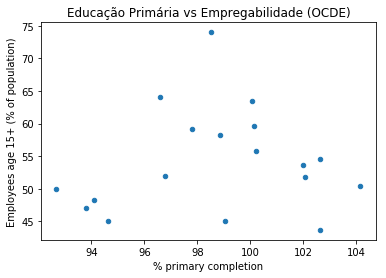

In [33]:
df1.plot.scatter(x='2005_educacao', y = '2005_empregados')
plt.title('Educação Primária vs Empregabilidade (OCDE)')
plt.xlabel('% primary completion')
plt.ylabel('Employees age 15+ (% of population)')

In [10]:
# Países que nao pertencem a OCDE para analisá-los separadamente:

empregados_n_OCDE = taxa_empregados.loc[(taxa_empregados.OCDE == 'não')]
educacao_n_OCDE = educ_primaria.loc[(educ_primaria.OCDE == 'não'), 
                                     (1991, 1992, 1993, 1994, 1995, 1996,
                                     1997, 1998, 1999, 2000, 2001, 2002, 2003,
                                     2004, 2005, 2006, 2007)]


In [11]:
educacao_n_OCDE

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country Name,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.619118,97.142860,94.404068,94.755241,90.215919,90.559898,88.197968,93.186119,95.588242
Afghanistan,NaN,NaN,29.069651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,28.555300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,92.024391,NaN,NaN,NaN,97.073212,96.880661,NaN,94.902428,93.870880,NaN,NaN,96.629097
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,68.879730,69.615913,69.794983,70.596321,71.592758,72.598328,73.399406,74.340240,75.264481,74.816620,75.948402,76.856773,79.329163,81.263092,82.122704,80.572083,82.618568
United Arab Emirates,96.038757,94.518082,92.034142,90.802330,88.815628,84.853012,86.836472,84.431313,83.093407,79.819542,76.231239,80.136543,NaN,NaN,NaN,NaN,97.162354
Argentina,NaN,NaN,NaN,98.680908,NaN,93.618874,92.180717,100.086517,98.217644,98.493736,98.086487,102.030724,99.923820,98.562859,96.684792,99.133202,101.852600
Armenia,NaN,NaN,NaN,108.263802,NaN,NaN,93.895500,NaN,NaN,NaN,NaN,93.707390,89.272758,100.047470,92.691582,93.811211,102.067139


In [12]:
empregados_n_OCDE

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,OCDE
Total above 15 employment to population (%),,,,,,,,,,,,,,,,,,
Afghanistan,56.700001,56.500000,56.599998,56.200001,56.200001,56.099998,56.200001,56.200001,56.099998,56.099998,56.500000,56.400002,54.400002,56.000000,54.000000,56.000000,55.700001,não
Albania,52.700001,52.299999,52.400002,52.700001,52.799999,52.599998,52.400002,52.099998,52.099998,51.900002,51.799999,51.799999,51.799999,51.700001,51.500000,51.400002,51.400002,não
Algeria,39.400002,38.900002,39.400002,39.400002,38.099998,38.900002,39.700001,39.500000,39.400002,38.599998,40.400002,41.500000,42.799999,46.400002,48.000000,50.000000,50.500000,não
Angola,75.800003,75.800003,75.500000,75.900002,75.800003,75.900002,75.699997,75.599998,75.599998,75.500000,75.500000,75.599998,75.500000,75.500000,75.599998,75.500000,75.699997,não
Argentina,53.599998,53.799999,53.700001,53.799999,53.500000,54.400002,54.900002,55.000000,54.900002,55.500000,55.599998,55.400002,57.299999,57.700001,58.099998,58.400002,58.400002,não
Armenia,39.299999,38.200001,37.400002,37.400002,37.099998,38.099998,37.400002,38.099998,37.200001,37.799999,38.599998,39.299999,39.500000,38.900002,39.500000,39.400002,40.099998,não
Azerbaijan,56.900002,56.799999,56.599998,56.200001,55.400002,55.799999,56.599998,56.700001,57.000000,57.400002,57.500000,57.500000,57.900002,59.400002,59.000000,59.299999,60.900002,não
Bahamas,63.000000,61.299999,62.799999,62.700001,64.500000,64.099998,65.199997,66.599998,66.699997,67.000000,67.099998,65.599998,64.400002,64.900002,65.000000,66.900002,66.599998,não
Bahrain,61.200001,61.400002,61.500000,61.799999,61.900002,61.900002,61.599998,61.599998,61.599998,61.599998,61.700001,61.500000,61.400002,61.200001,61.000000,60.599998,60.400002,não


In [13]:
#escolha de um ano para analise:
educacao_n_1996 = educacao_n_OCDE.loc[:,[2005]]
empregados_n_1996 = empregados_n_OCDE.loc[:,[2005]]


In [14]:
empregados_n_1996.head()

,2005
Total above 15 employment to population (%),
Afghanistan,54.000000
Albania,51.500000
Algeria,48.000000
Angola,75.599998
Argentina,58.099998


In [15]:
df = empregados_n_1996.join(educacao_n_1996, how='inner', lsuffix='_empregados', rsuffix='_educacao')
df

,2005_empregados,2005_educacao
Afghanistan,54.000000,NaN
Albania,51.500000,NaN
Algeria,48.000000,93.185028
Angola,75.599998,NaN
Argentina,58.099998,96.684792
Armenia,39.500000,92.691582
Azerbaijan,59.000000,93.430618
Bahrain,61.000000,101.628448
Bangladesh,68.599998,64.261673
Barbados,66.099998,91.670860


Text(0, 0.5, 'Employees age 15+ (% of population)')

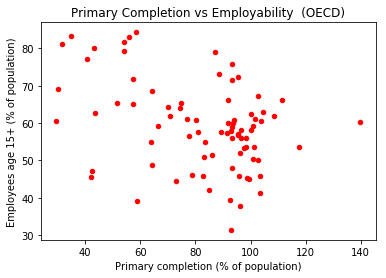

In [37]:
df.plot.scatter(x='2005_educacao', y = '2005_empregados', color ='r')
plt.title('Primary Completion vs Employability  (OECD)')
plt.xlabel('Primary completion (% of population)')
plt.ylabel('Employees age 15+ (% of population)')
#como faz a reta? correlacao e covariancia

In [17]:
print("Covariância entre educacao e empregados:",np.cov(df.1996_educacao,df.1996_empregados)[0,1])

SyntaxError: invalid token (<ipython-input-17-3290e2460745>, line 1)

In [ ]:
lista_n_OCDE = []
for pais in educacao_n_OCDE.index:
    if pais in empregados_n_OCDE.index:
        lista_n_OCDE.append(pais)

lista_n_OCDE       

In [ ]:
educacao_n_OCDE_new.index.value_counts()

In [ ]:
empregados_n_OCDE.index.value_counts()

# Escolha de um ano para análise



In [38]:
#escolha de um ano para analise
educacao_1996 = educ_primaria.loc[:,[1996]]
empregados_1996 = taxa_empregados.loc[:, [1996]]

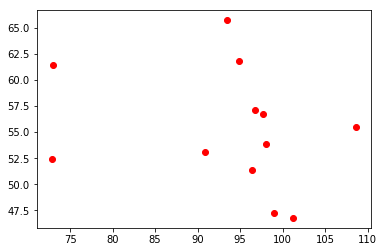

In [39]:
plt.scatter(educ_primaria.loc[educ_primaria.OCDE=="sim",1996], taxa_empregados.loc[taxa_empregados.OCDE=="sim", 1996], color="r")


In [40]:
media_educ_primaria = educ_primaria.mean()
anos = media_educ_primaria.index

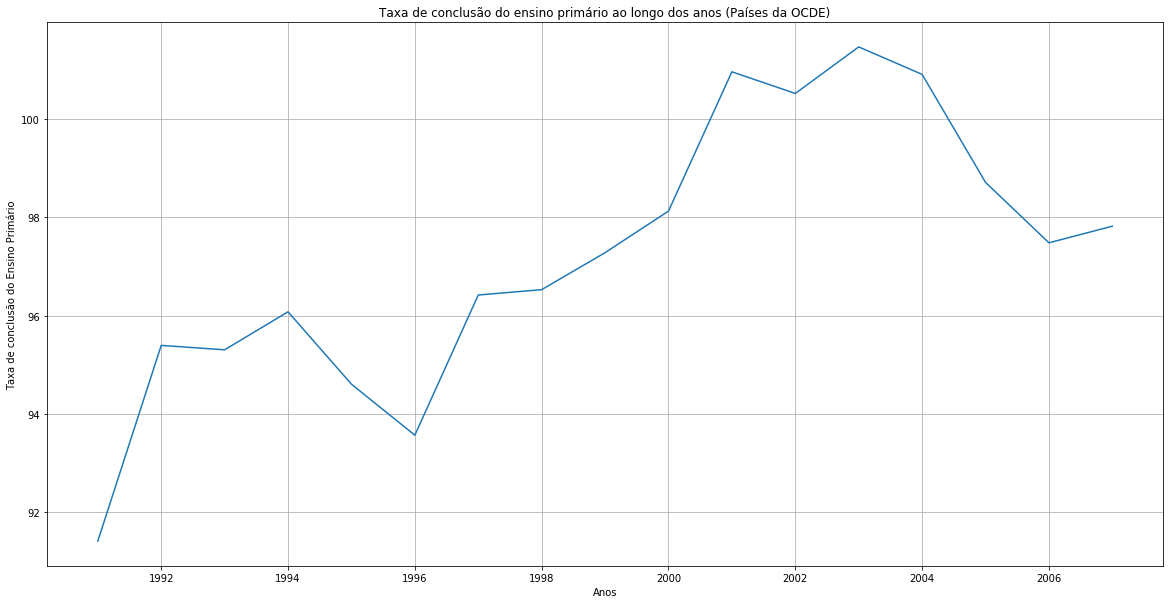

In [41]:
media_educ_OCDE = educacao_OCDE.mean()
anos = media_educ_OCDE.index

plt.figure(figsize=(20,10))
plt.plot(anos, media_educ_OCDE)
plt.title('Taxa de conclusão do ensino primário ao longo dos anos (Países da OCDE)')
plt.xlabel('Anos')
plt.ylabel('Taxa de conclusão do Ensino Primário')
plt.grid(True)

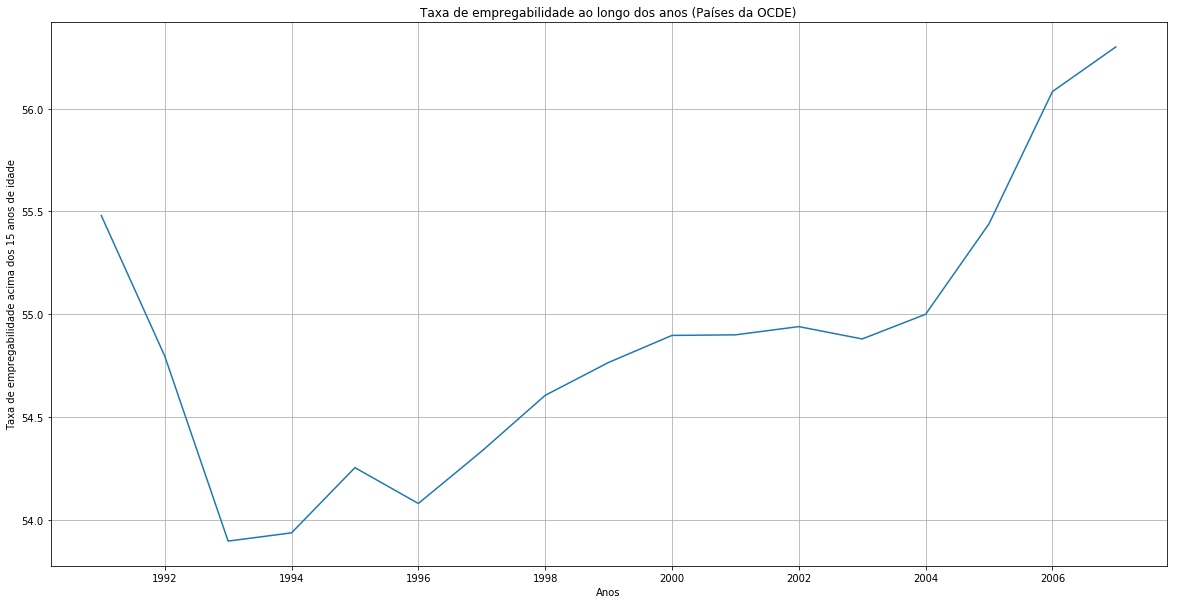

In [42]:
media_taxa_empregados_OCDE = empregados_OCDE.mean()
anos = media_taxa_empregados_OCDE.index

plt.figure(figsize =(20,10))
plt.plot(anos, media_taxa_empregados_OCDE)
plt.title('Taxa de empregabilidade ao longo dos anos (Países da OCDE)')
plt.xlabel('Anos')
plt.ylabel('Taxa de empregabilidade acima dos 15 anos de idade')
plt.grid(True)

In [43]:
educacao_anos = educacao_OCDE.loc[:,(1991, 1992, 1993, 1994, 1995, 1996,
                                     1997, 1998, 1999, 2000, 2001, 2002, 2003,
                                     2004, 2005, 2006, 2007)]

educ_primaria_transposta = educacao_anos.T
educ_primaria_transposta

Country Name,Australia,Austria,Belgium,Canada,Switzerland,Chile,Czech Republic,Germany,Spain,Estonia,...,Netherlands,Norway,New Zealand,Poland,Portugal,Slovak Republic,Slovenia,Sweden,Turkey,United States
1991,NaN,NaN,79.334824,NaN,53.627510,NaN,NaN,NaN,NaN,NaN,...,NaN,99.900627,NaN,96.131989,NaN,NaN,NaN,96.287872,96.924141,NaN
1992,NaN,NaN,NaN,NaN,55.172932,NaN,NaN,NaN,NaN,NaN,...,NaN,101.196899,NaN,97.171089,NaN,96.136612,NaN,100.509842,102.611740,NaN
1993,NaN,NaN,NaN,NaN,61.180141,NaN,96.686157,100.044098,100.732468,NaN,...,NaN,99.980568,NaN,99.250298,NaN,96.191856,93.080978,106.092323,95.969322,NaN
1994,NaN,NaN,NaN,NaN,62.227299,NaN,103.843307,96.418747,101.817101,NaN,...,NaN,NaN,NaN,95.677498,NaN,98.258652,92.395210,104.279068,95.911621,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,104.551491,95.881241,NaN,79.647263,...,NaN,NaN,NaN,95.201401,NaN,98.301582,93.846321,NaN,93.952103,NaN
1996,NaN,NaN,NaN,NaN,72.855164,NaN,108.631989,96.412239,NaN,90.816757,...,NaN,NaN,NaN,98.002892,NaN,96.787010,93.493721,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.558998,NaN,NaN,...,NaN,NaN,NaN,99.147278,NaN,95.723511,94.970573,NaN,NaN,NaN
1998,NaN,100.917717,NaN,94.151108,NaN,NaN,NaN,NaN,NaN,89.438744,...,NaN,97.690376,NaN,97.391808,NaN,98.030571,99.245987,NaN,NaN,NaN
1999,NaN,100.874878,NaN,95.618668,95.226646,NaN,99.461861,101.216827,NaN,93.369072,...,NaN,97.633110,NaN,96.586479,NaN,97.543251,99.364807,100.405167,NaN,NaN
2000,NaN,NaN,NaN,97.303520,96.278473,NaN,99.344261,104.121872,NaN,95.667747,...,NaN,97.922791,NaN,95.706947,NaN,96.267418,96.302361,99.553047,NaN,NaN


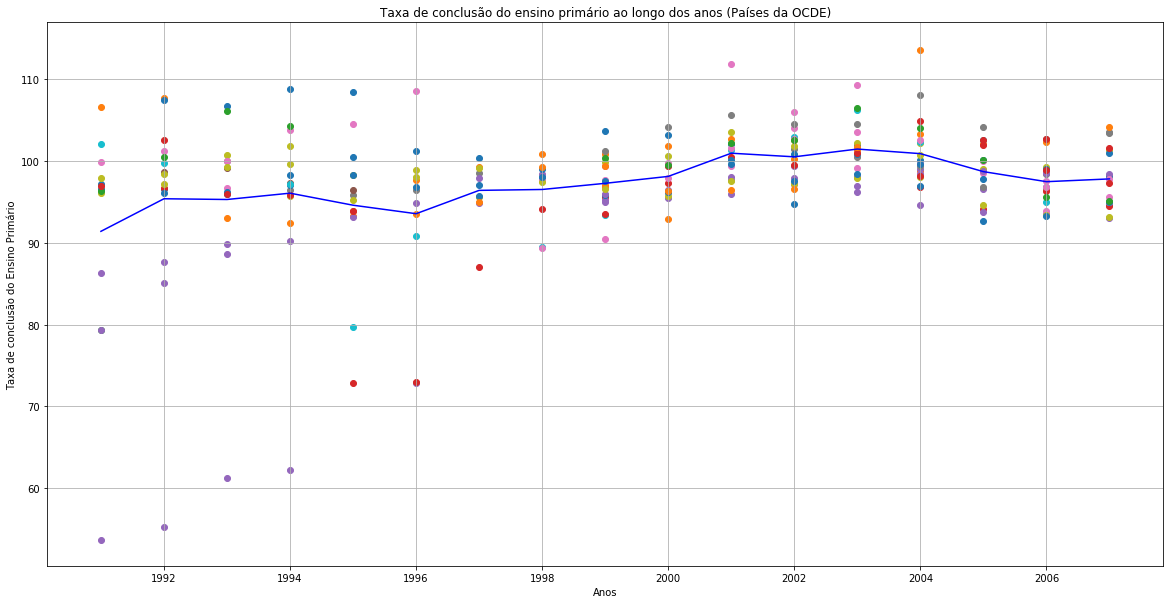

In [44]:
media_educacao = educacao_anos.mean()
plt.figure(figsize=(20,10))
for pais in educ_primaria_transposta.columns:
    plt.scatter(x=educ_primaria_transposta.index, y=educ_primaria_transposta[pais])
plt.plot(media_educacao.index, media_educacao, color = 'b')
plt.title('Taxa de conclusão do ensino primário ao longo dos anos (Países da OCDE)')
plt.xlabel('Anos')
plt.ylabel('Taxa de conclusão do Ensino Primário')
plt.grid(True)

In [45]:
empregados_datas = [  1991,   1992,   1993,   1994,   1995,   1996,   1997,   1998,   1999,
         2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007]

In [46]:
empregados_anos = empregados_OCDE.loc[:, empregados_datas]
empregados_anos_t = empregados_anos.T

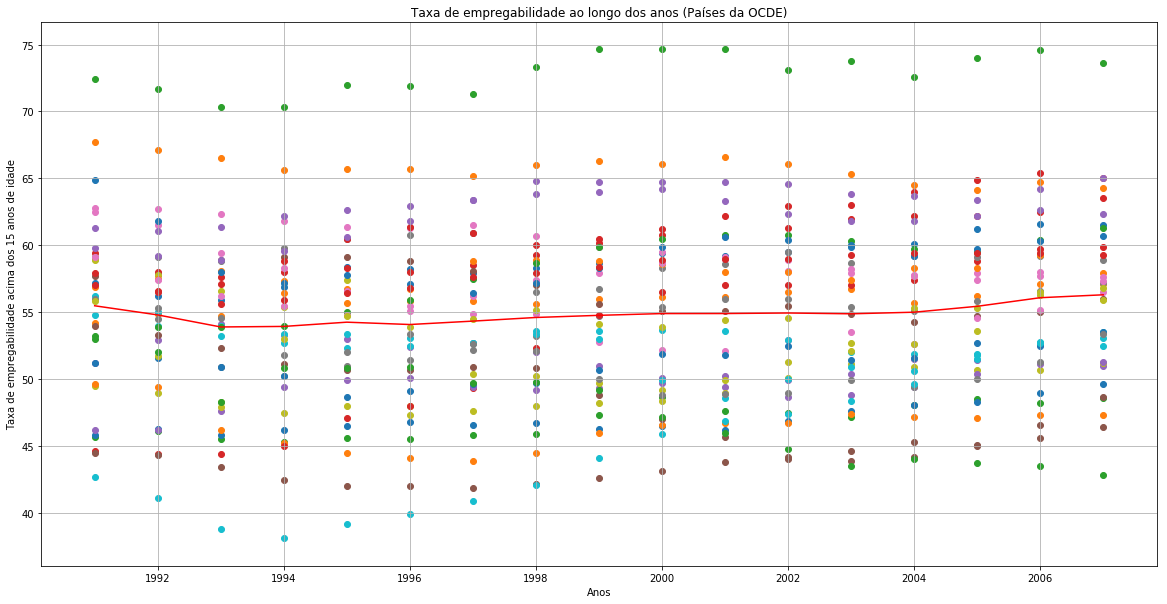

In [47]:
medias_empregados = empregados_anos.mean()
plt.figure(figsize=(20,10))
for pais in empregados_anos_t.columns:
    plt.scatter(x=empregados_anos_t.index, y=empregados_anos_t[pais])
plt.plot(medias_empregados.index,  medias_empregados, color="r")
plt.title('Taxa de empregabilidade ao longo dos anos (Países da OCDE)')
plt.xlabel('Anos')
plt.ylabel('Taxa de empregabilidade acima dos 15 anos de idade')
plt.grid(True)